In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = fetch_california_housing()

In [3]:
x = data.data
y = data.target

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(x, columns=data.feature_names)
df['price'] = y
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


array([[<Axes: xlabel='MedInc', ylabel='MedInc'>,
        <Axes: xlabel='HouseAge', ylabel='MedInc'>,
        <Axes: xlabel='AveRooms', ylabel='MedInc'>,
        <Axes: xlabel='AveBedrms', ylabel='MedInc'>,
        <Axes: xlabel='Population', ylabel='MedInc'>,
        <Axes: xlabel='AveOccup', ylabel='MedInc'>,
        <Axes: xlabel='Latitude', ylabel='MedInc'>,
        <Axes: xlabel='Longitude', ylabel='MedInc'>,
        <Axes: xlabel='price', ylabel='MedInc'>],
       [<Axes: xlabel='MedInc', ylabel='HouseAge'>,
        <Axes: xlabel='HouseAge', ylabel='HouseAge'>,
        <Axes: xlabel='AveRooms', ylabel='HouseAge'>,
        <Axes: xlabel='AveBedrms', ylabel='HouseAge'>,
        <Axes: xlabel='Population', ylabel='HouseAge'>,
        <Axes: xlabel='AveOccup', ylabel='HouseAge'>,
        <Axes: xlabel='Latitude', ylabel='HouseAge'>,
        <Axes: xlabel='Longitude', ylabel='HouseAge'>,
        <Axes: xlabel='price', ylabel='HouseAge'>],
       [<Axes: xlabel='MedInc', ylabel='AveRoo

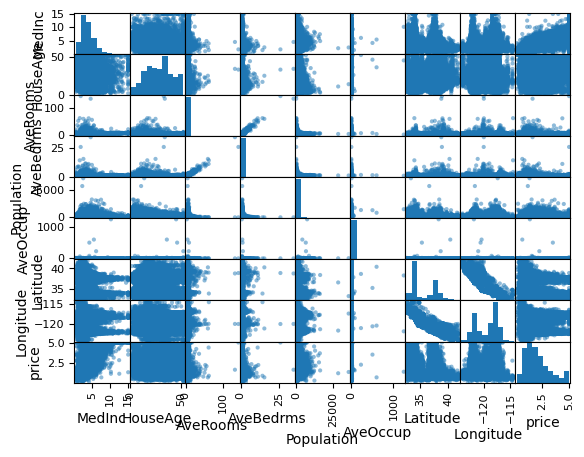

In [9]:
pd.plotting.scatter_matrix(df)

In [11]:
import matplotlib.pyplot as plt

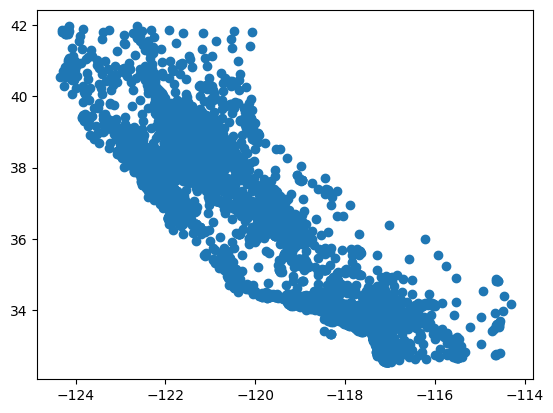

In [12]:
plt.scatter(df.Longitude.values, df.Latitude.values)

In [13]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

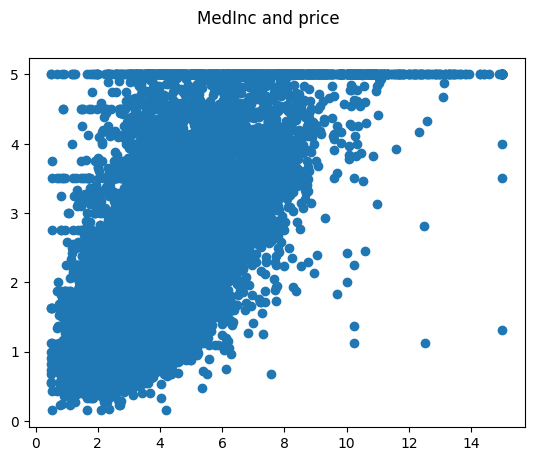

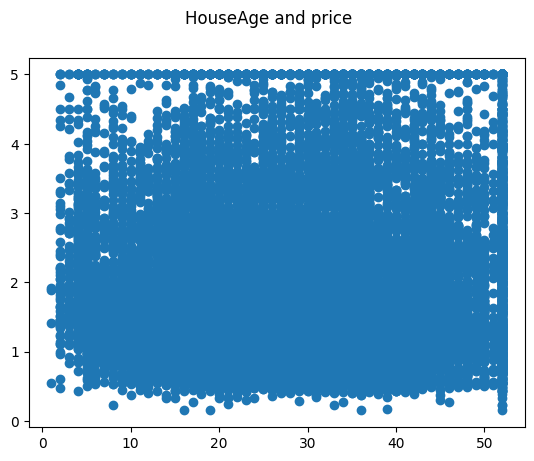

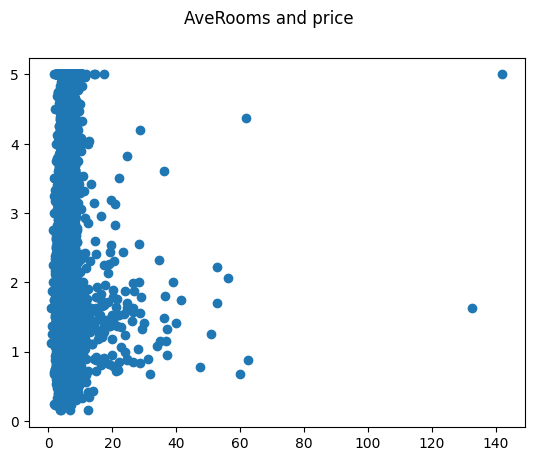

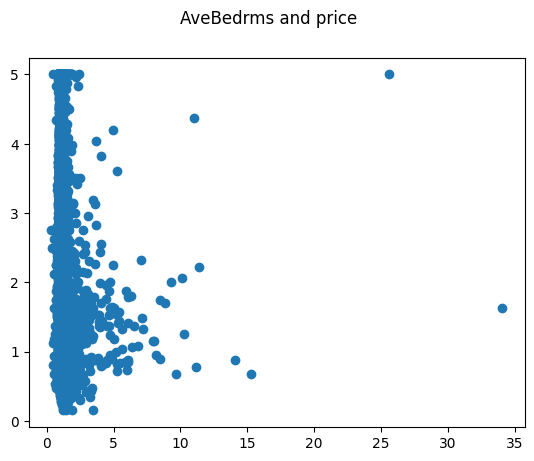

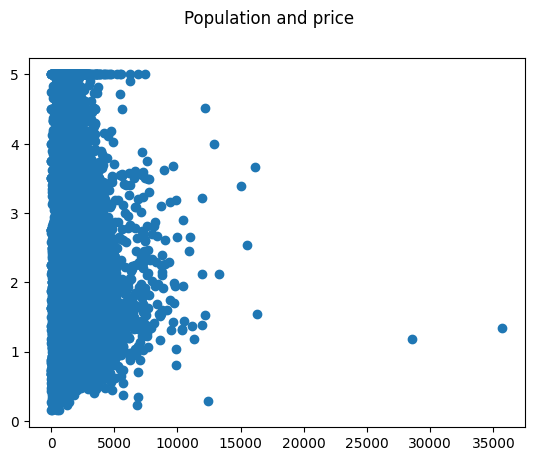

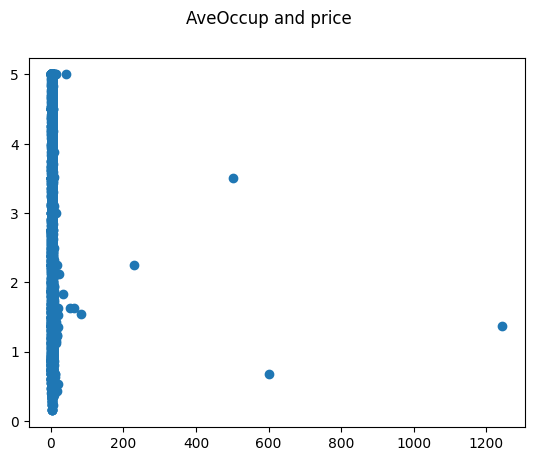

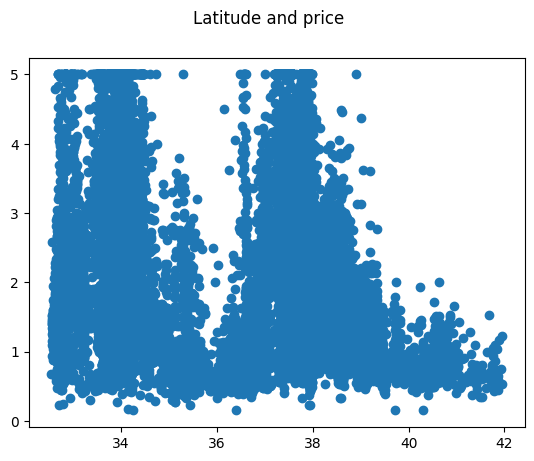

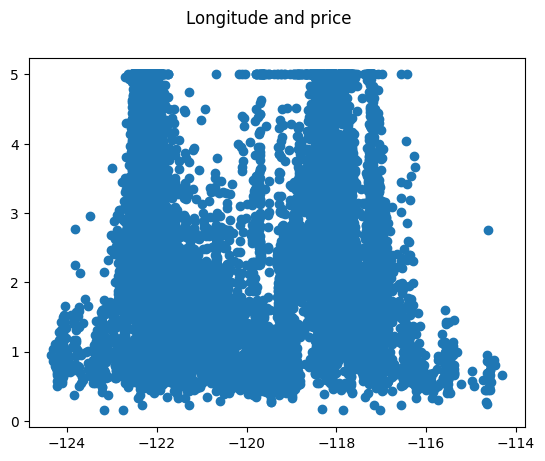

In [17]:
for i in df.columns[:-1]:
    plt.scatter(df[i].values, df.price.values)
    plt.suptitle(f'{i} and price')
    plt.show()

In [18]:
x1 = df.Longitude.values
y1 = df.Latitude.values

In [19]:
pl = PolynomialFeatures(degree=2)

In [20]:
x1

array([-122.23, -122.22, -122.24, ..., -121.22, -121.32, -121.24])

In [24]:
x1_p = pl.fit_transform(x1.reshape(-1, 1))

In [25]:
x1_p

array([[ 1.00000000e+00, -1.22230000e+02,  1.49401729e+04],
       [ 1.00000000e+00, -1.22220000e+02,  1.49377284e+04],
       [ 1.00000000e+00, -1.22240000e+02,  1.49426176e+04],
       ...,
       [ 1.00000000e+00, -1.21220000e+02,  1.46942884e+04],
       [ 1.00000000e+00, -1.21320000e+02,  1.47185424e+04],
       [ 1.00000000e+00, -1.21240000e+02,  1.46991376e+04]])

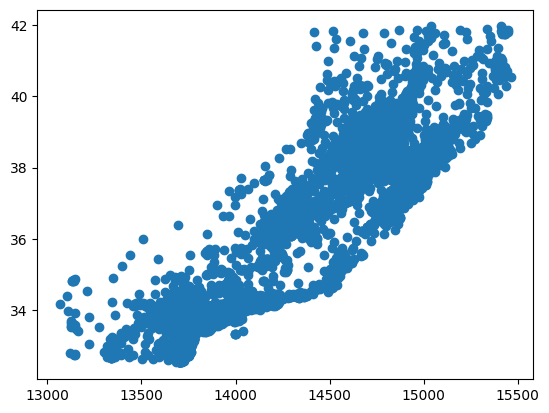

In [52]:
plt.scatter(x1_p[:, 2], y1)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression().fit(x1_p, y1)

In [37]:
reg.coef_

array([0.        , 0.46758219, 0.00606234])

In [38]:
reg.intercept_

4.843444421914413

In [53]:
#import numpy as np

In [46]:
x1_p

array([[ 1.00000000e+00, -1.22230000e+02,  1.49401729e+04],
       [ 1.00000000e+00, -1.22220000e+02,  1.49377284e+04],
       [ 1.00000000e+00, -1.22240000e+02,  1.49426176e+04],
       ...,
       [ 1.00000000e+00, -1.21220000e+02,  1.46942884e+04],
       [ 1.00000000e+00, -1.21320000e+02,  1.47185424e+04],
       [ 1.00000000e+00, -1.21240000e+02,  1.46991376e+04]])

In [50]:
pr = x1_p @ reg.coef_ + reg.intercept_
pr

array([38.26327319, 38.25312962, 38.27341796, ..., 37.24489589,
       37.34517365, 37.26494174])

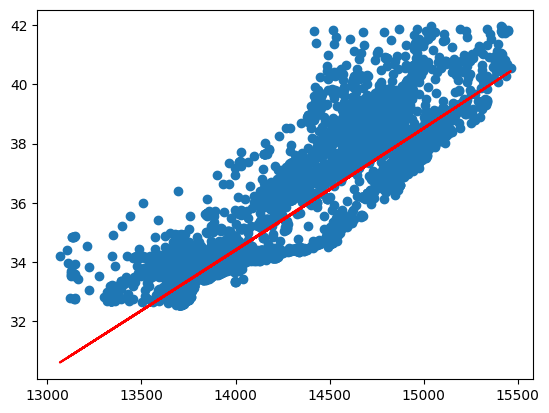

In [51]:
plt.plot(x1_p[:, 2], pr, c='red')
plt.scatter(x1_p[:, 2], y1)